In [5]:
import matplotlib.pyplot as plt #For plotting our visualizations
from keras.preprocessing.image import ImageDataGenerator #Keras dataset generator class.
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
from PIL import Image

In [8]:
from google.colab import files
files.upload()

Saving dog.jpeg to dog.jpeg


{'dog.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 70\n\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x048\x07\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba

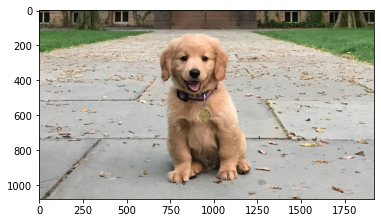

In [10]:
image = Image.open('dog.jpeg')
plt.imshow(image)
plt.show()

Applying Transformation Operations  :

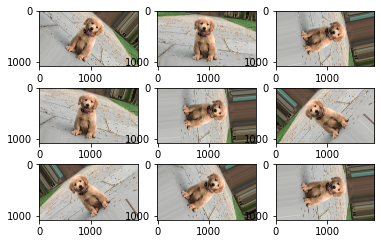

In [19]:
#Rotation
data = img_to_array(image)
samples = expand_dims(data, 0)
data_generated = ImageDataGenerator(rotation_range=90)  #Here we specify angle of rotation as 90
it = data_generated.flow(samples, batch_size=1)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

Translation Operation : 
> We can apply shift transformations on images horizontally, vertically, left or right. This kind of transformation is very useful for avoiding positional bias in data. For example, training a Face Recognition model on a dataset where the faces are centered in the images would result in positional bias, making the model perform very poorly on new faces that are positioned to the left or right. We’ll be using height_shift_range and width_shift_range parameters of the ImageDataGenerator class for this purpose.



 -- Applying vertical shift --

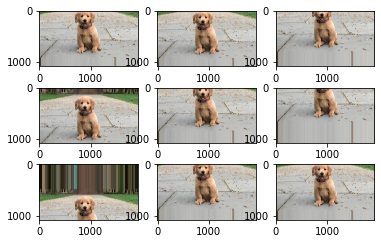

In [12]:
data = img_to_array(image)
samples = expand_dims(data, 0)
data_generator = ImageDataGenerator(height_shift_range=0.5)
it = data_generator.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

-- Applying Horizontal shift --

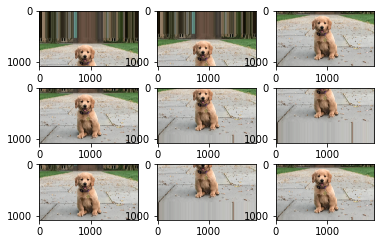

In [20]:
data = img_to_array(image)
samples = expand_dims(data, 0)
# data_generator = ImageDataGenerator(width_shift_range=[-100,100])
it = data_generator.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

Color Space :
> Here we will apply transformation on the color channels space of our dog image. What happens here is that it isolates a single color channel (R, G, or B) and the result is either a brightened or darkened version of the image. By simply specifying brightness_range value (usually a tuple or list of two floats) in the ImageDataGenerator class, we can set the brightness shift value to pick from.




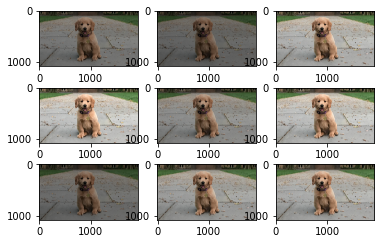

In [21]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

Zooming :
> As the name implies, we can apply transformation on our dog image to get zoomed in/out versions of the image by simply passing in the zoom_range attribute of the ImageDataGenerator class.

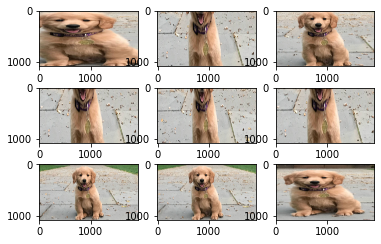

In [22]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

Flipping : 
>Applying a flip transformation allows us to change the direction of our image horizontally or vertically by setting vertical_flip=True or horizontal_flip=True.

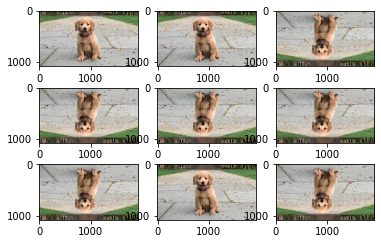

In [23]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

With this new dataset that we generated, we can clean it, and eliminate images that are skewed, or those with meaningless information. Then it can be used to train an object detection model or a dog classifier.